## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# LOAD DATA

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [2]:
# answer goes here
data = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv'
df = pd.read_csv(data)

# FILTER/CLEAN DATA

As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [3]:
# answer goes here
score = df.filter(like='score', axis=1)
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FWBscore  6394 non-null   int64  
 1   FSscore   6394 non-null   int64  
 2   LMscore   6394 non-null   int64  
 3   KHscore   6394 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 199.9 KB


In [22]:
score

FWBscore  FSscore  LMscore  KHscore
0           55       44        3    1.267
1           51       43        3   -0.570
2           49       42        3   -0.188
3           49       42        2   -1.485
4           49       42        1   -1.900
...        ...      ...      ...      ...
6389        61       47        3    1.267
6390        59       59        1   -1.215
6391        59       51        2   -1.215
6392        46       54        2   -1.215
6393        49       42        2   -1.215

[6394 rows x 4 columns]

# PROCESS DATA

Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [4]:
# answer goes here
scale = StandardScaler()
scaled = pd.DataFrame(scale.fit_transform(score), columns=score.columns)

# ELBOW (INERTIA) PLOT

Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

In [13]:
# answer goes here
distortions = []
K = range(2,31)
for k in K:
  kmean = KMeans(n_clusters=k)
  kmean.fit(scaled)
  distortions.append(kmean.inertia_)

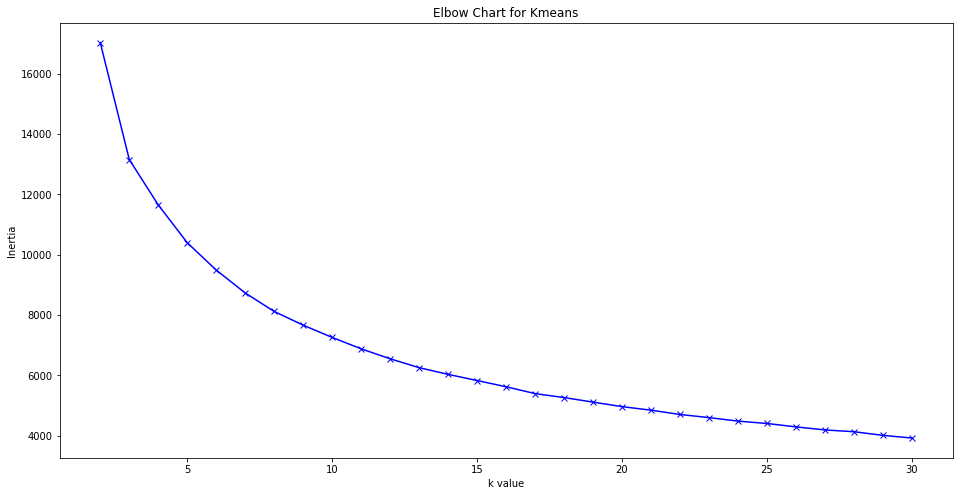

In [15]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k value')
plt.ylabel('Inertia')
plt.title('Elbow Chart for Kmeans')
plt.show()

No clear elbow emerges from the plot. A slight kink at 3 but nothing more beyond that. 

# SILHOUETTE PLOT

Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

In [16]:
# answer goes here
silhouette = []
K1 = range(2,31)
for k1 in K1:
  kmean1 = KMeans(n_clusters=k1)
  clus = kmean1.fit_predict(scaled)
  silhouette.append(silhouette_score(scaled, clus, metric='euclidean'))

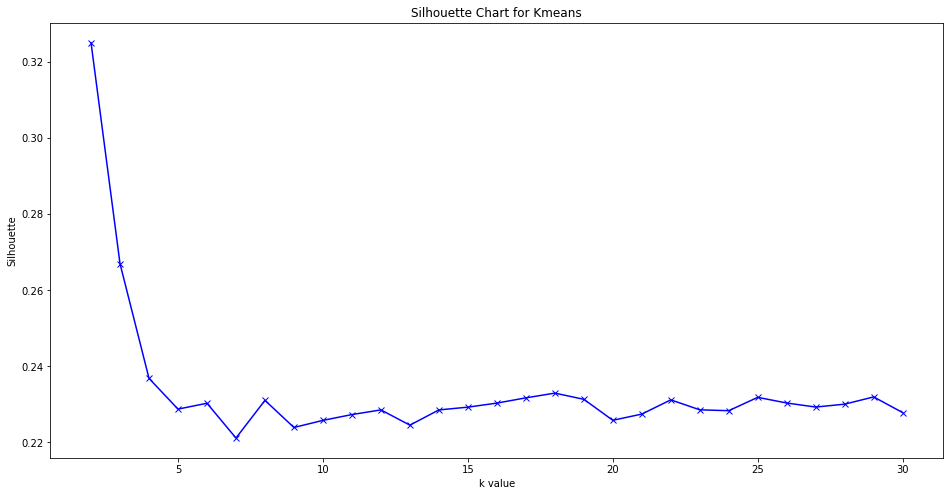

In [17]:
plt.figure(figsize=(16,8))
plt.plot(K1, silhouette, 'bx-')
plt.xlabel('k value')
plt.ylabel('Silhouette')
plt.title('Silhouette Chart for Kmeans')
plt.show()

The optimal number of clusters according to the silhouette plot is  k=2. Not entirely consistent but with the elbow (inertia) plot it is hard to have a defined elbow at the first value for k. There is a kink at 3 but everything else is rather smooth. 

# CLUSTER INFO

In [20]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit_predict(scaled)

clust = scale.inverse_transform(kmeans3.cluster_centers_)
clust = pd.DataFrame(clust, columns=scaled.columns)
clust.style.background_gradient()

In [23]:
score['cluster'] = kmeans3.fit_predict(scaled)
score.style.background_gradient()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
score.cluster.value_counts()

0    2391
1    2232
2    1771
Name: cluster, dtype: int64

In [39]:
score.describe()

FWBscore      FSscore      LMscore      KHscore      cluster
count  6394.000000  6394.000000  6394.000000  6394.000000  6394.000000
mean     56.034094    50.719112     2.506256    -0.056935     0.903034
std      14.154676    12.656921     0.755215     0.814936     0.801012
min      -4.000000    -1.000000     0.000000    -2.053000     0.000000
25%      48.000000    42.000000     2.000000    -0.570000     0.000000
50%      56.000000    50.000000     3.000000    -0.188000     1.000000
75%      65.000000    57.000000     3.000000     0.712000     2.000000
max      95.000000    85.000000     3.000000     1.267000     2.000000

In [48]:
print('Distinct number of FWBscore values:', len(list(score.FWBscore.value_counts())))
print('Distinct number of FSscore values:', len(list(score.FSscore.value_counts())))
print('Distinct number of LMscore values:', len(list(score.LMscore.value_counts())))
print('Distinct number of KHscore values:', len(list(score.KHscore.value_counts())))


Distinct number of FWBscore values: 79
Distinct number of FSscore values: 77
Distinct number of LMscore values: 4
Distinct number of KHscore values: 11


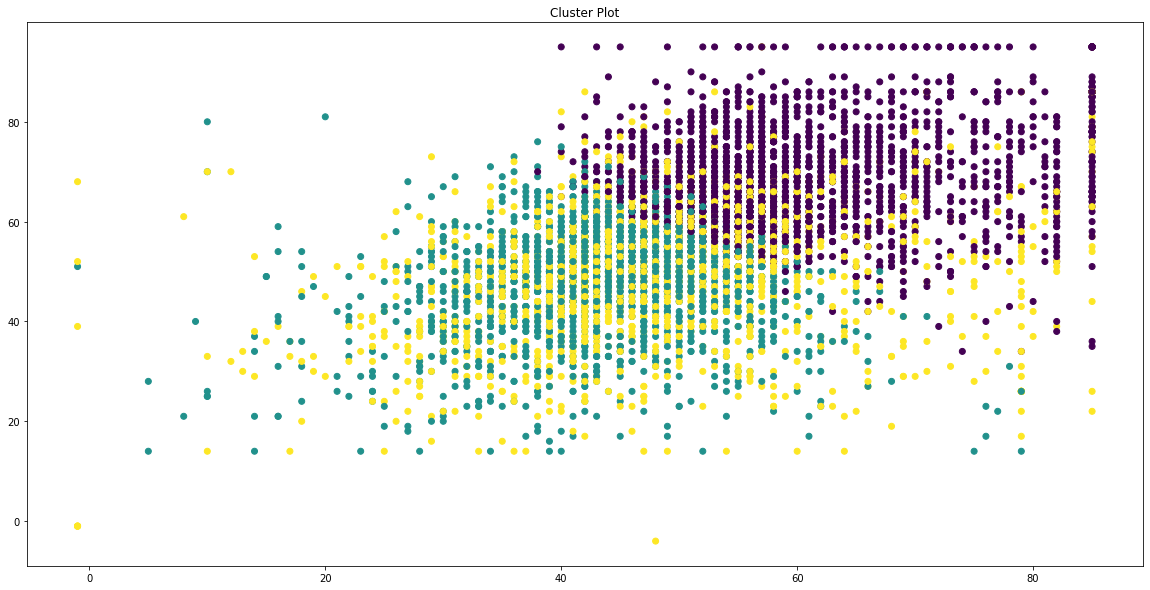

In [35]:
plt.figure(figsize=(20,10))
plt.scatter(y=score['FWBscore'], x=score['FSscore'],c=score['cluster'] )
plt.xlabel('')
plt.ylabel('')
plt.title('Cluster Plot')
plt.show()

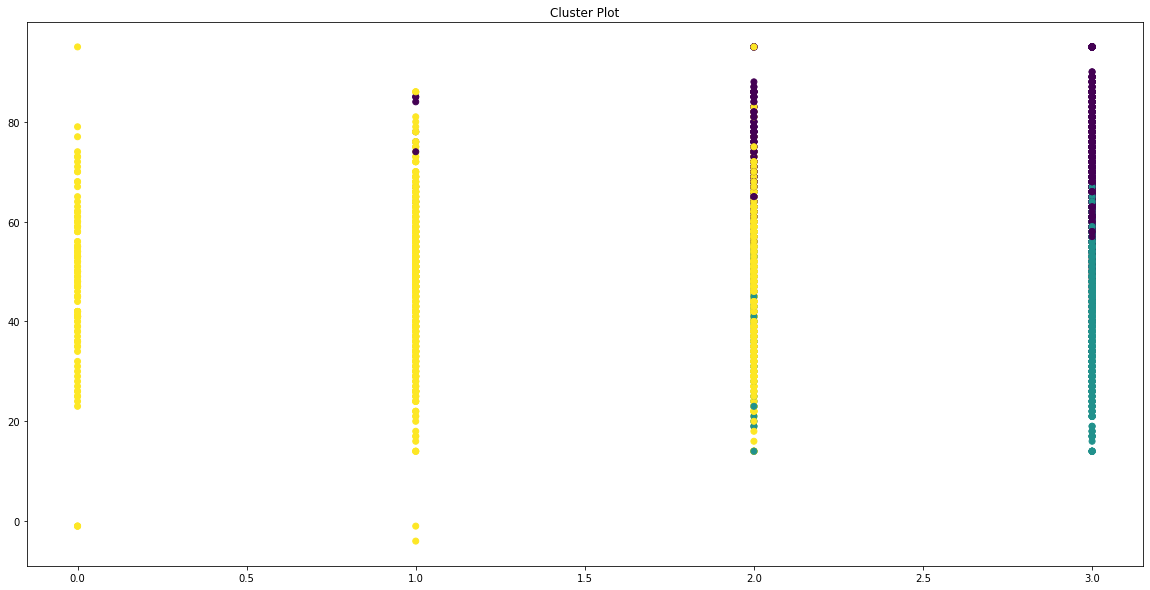

In [36]:
plt.figure(figsize=(20,10))
plt.scatter(y=score['FWBscore'], x=score['LMscore'],c=score['cluster'] )
plt.xlabel('')
plt.ylabel('')
plt.title('Cluster Plot')
plt.show()

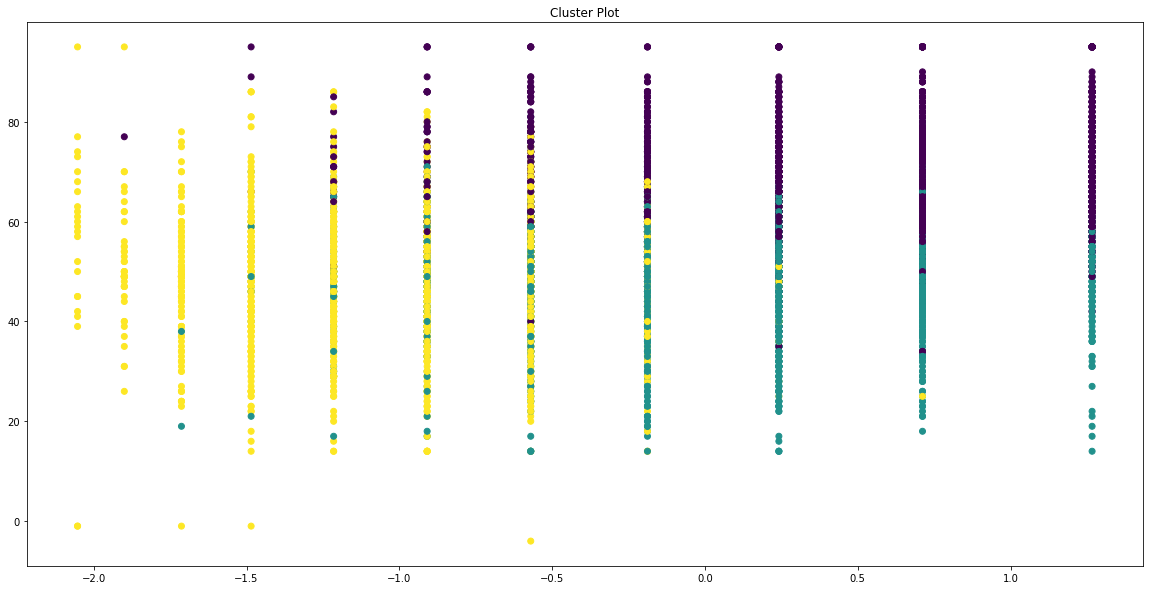

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(y=score['FWBscore'], x=score['KHscore'],c=score['cluster'] )
plt.xlabel('')
plt.ylabel('')
plt.title('Cluster Plot')
plt.show()

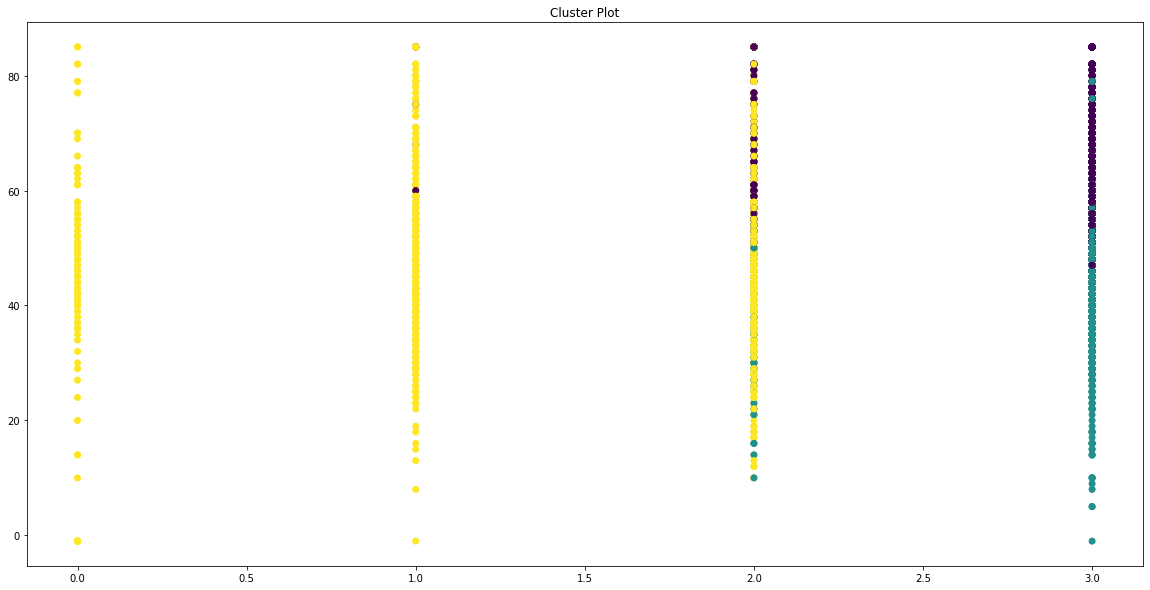

In [31]:
plt.figure(figsize=(20,10))
plt.scatter(y=score['FSscore'], x=score['LMscore'],c=score['cluster'] )
plt.xlabel('')
plt.ylabel('')
plt.title('Cluster Plot')
plt.show()

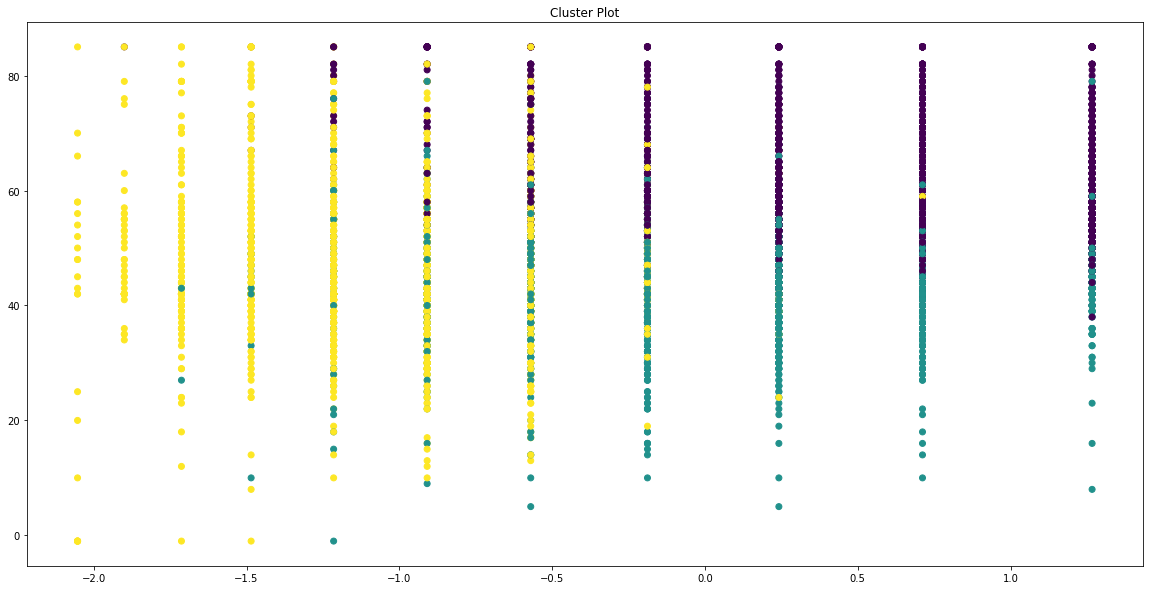

In [37]:
plt.figure(figsize=(20,10))
plt.scatter(y=score['FSscore'], x=score['KHscore'],c=score['cluster'] )
plt.xlabel('')
plt.ylabel('')
plt.title('Cluster Plot')
plt.show()

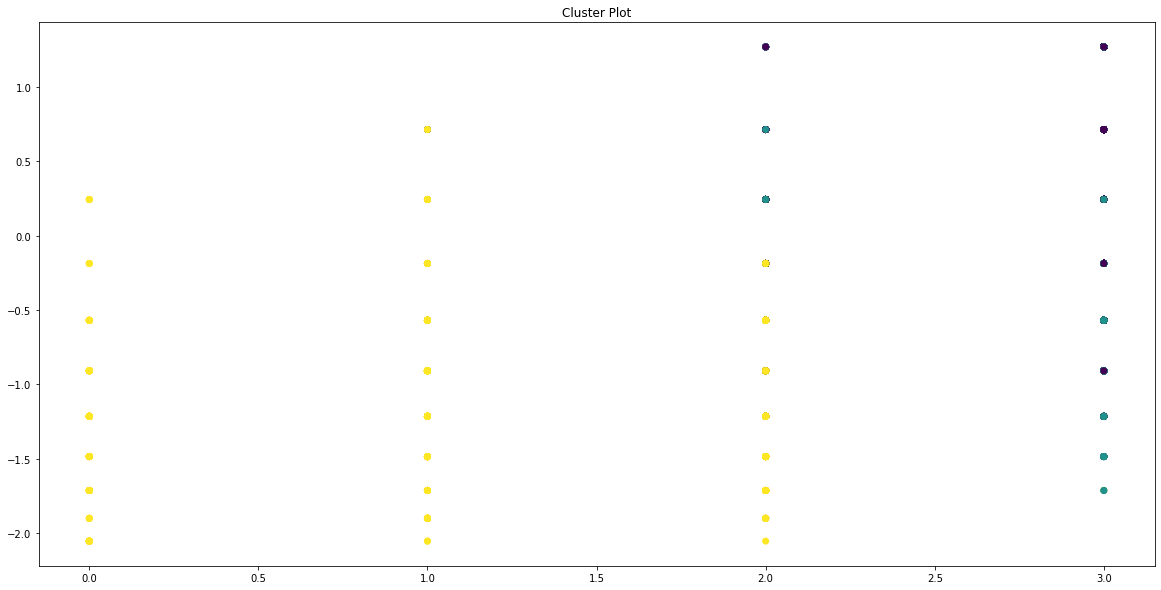

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(x=score['LMscore'], y=score['KHscore'],c=score['cluster'] )
plt.xlabel('')
plt.ylabel('')
plt.title('Cluster Plot')
plt.show()

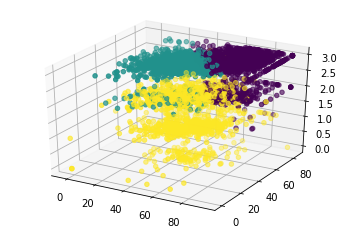

In [91]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs=score['FWBscore'],ys=score['FSscore'],zs=score['LMscore'],c=score['cluster'])




<Figure size 432x288 with 0 Axes>